In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA of Datasets

#### Exploring the Calendar Dataset

In [2]:
#Calendar Data:

calendar = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/calendar-9-18-22.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,$225.00,$225.00,4.0,365.0
1,29967,2022-09-19,f,$225.00,$225.00,4.0,365.0
2,29967,2022-09-20,f,$225.00,$225.00,4.0,365.0
3,29967,2022-09-21,f,$225.00,$225.00,4.0,365.0
4,29967,2022-09-22,f,$225.00,$225.00,4.0,365.0


In [3]:
calendar['listing_id'].nunique()

14186

There are a total of 14,186 individual property listings

In [4]:
calendar.shape

(5173672, 7)

There are over 5 million rows of data and 7 features in this dataset

In [5]:
calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

#### Converting the data types into the correct format

In [6]:
#converting price & adjusted price to integer

calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',','')
calendar['price'] = pd.to_numeric(calendar['price'])

calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',','')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'])

/var/folders/51/q9hxxxv54rs_ms2xxv3y82fm0000gn/T/ipykernel_90183/2502108965.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',','')
/var/folders/51/q9hxxxv54rs_ms2xxv3y82fm0000gn/T/ipykernel_90183/2502108965.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',','')


In [7]:
#Converting the date column into the correct data formart

calendar['date'] = pd.to_datetime(calendar['date'])

In [8]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,225.0,225.0,4.0,365.0
1,29967,2022-09-19,f,225.0,225.0,4.0,365.0
2,29967,2022-09-20,f,225.0,225.0,4.0,365.0
3,29967,2022-09-21,f,225.0,225.0,4.0,365.0
4,29967,2022-09-22,f,225.0,225.0,4.0,365.0


In [9]:
calendar.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
5173667,103841,2023-09-13,f,103.0,103.0,2.0,31.0
5173668,103841,2023-09-14,f,103.0,103.0,2.0,31.0
5173669,103841,2023-09-15,f,103.0,103.0,2.0,31.0
5173670,103841,2023-09-16,f,103.0,103.0,2.0,31.0
5173671,103841,2023-09-17,f,103.0,103.0,2.0,31.0


In [10]:
calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,5.173672e+06,5.170977e+06,5.170977e+06,5.167851e+06,5.167851e+06
mean,1.598379e+17,3.963504e+02,3.947934e+02,7.522396e+00,3.040892e+05
std,2.767907e+17,1.185625e+03,1.183286e+03,2.055726e+01,2.552146e+07
min,2.996700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.501354e+07,1.250000e+02,1.250000e+02,2.000000e+00,3.650000e+02
50%,4.540952e+07,2.110000e+02,2.110000e+02,3.000000e+00,1.125000e+03
75%,5.223218e+17,3.990000e+02,3.990000e+02,5.000000e+00,1.125000e+03
max,7.181068e+17,1.000000e+05,1.000000e+05,9.990000e+02,2.147484e+09


Based on the descriptive statistics, price_usd and adjusted_price_usd are the same so we can drop on of the columns

In [11]:
del calendar['adjusted_price']

In [12]:
calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,225.0,4.0,365.0
1,29967,2022-09-19,f,225.0,4.0,365.0
2,29967,2022-09-20,f,225.0,4.0,365.0
3,29967,2022-09-21,f,225.0,4.0,365.0
4,29967,2022-09-22,f,225.0,4.0,365.0


In [13]:
calendar.isnull().sum()

listing_id           0
date                 0
available            0
price             2695
minimum_nights    5821
maximum_nights    5821
dtype: int64

In [14]:
#drop the null price values

calendar.dropna()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,225.0,4.0,365.0
1,29967,2022-09-19,f,225.0,4.0,365.0
2,29967,2022-09-20,f,225.0,4.0,365.0
3,29967,2022-09-21,f,225.0,4.0,365.0
4,29967,2022-09-22,f,225.0,4.0,365.0
...,...,...,...,...,...,...
5173667,103841,2023-09-13,f,103.0,2.0,31.0
5173668,103841,2023-09-14,f,103.0,2.0,31.0
5173669,103841,2023-09-15,f,103.0,2.0,31.0
5173670,103841,2023-09-16,f,103.0,2.0,31.0


Around 8,516 rows of data loss with removal of null values

Looking at the available feature

In [26]:
calendar.available.unique()

array(['f', 't'], dtype=object)

'f' must mean false indicating that the listing isn't available. 't' must mean true indicating that the listing is available. This categorical feature can be encoded.

#### Exploring the Reviews dataset

In [17]:
reviews = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/reviews-9-18-22.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,29967,62788,2010-07-09,151260,Debbie,When I booked our stay in San Diego at Dennis ...
1,29967,64568,2010-07-14,141552,Eric,This was my first experience with using airbnb...
2,29967,67502,2010-07-22,141591,David,We found the house to be very accommodating--e...
3,29967,70466,2010-07-29,125982,Anders,As advertised and more. Dennis was very helpfu...
4,29967,74876,2010-08-07,29835,Miyoko,We had a great time in San Diego. Denis' house...


Not sure if this dataset will be necessary

#### Exploring Listings Dataset

In [18]:
listings = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/listings-9-18-22.csv')

listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,29967,https://www.airbnb.com/rooms/29967,20220918143850,2022-09-18,city scrape,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,...,4.91,4.80,4.76,NaN,f,5,5,0,0,0.59
1,38245,https://www.airbnb.com/rooms/38245,20220918143850,2022-09-18,city scrape,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,...,4.79,4.61,4.40,NaN,f,3,0,3,0,1.02
2,108349,https://www.airbnb.com/rooms/108349,20220918143850,2022-09-19,previous scrape,Felspar Townhome- Beach Living by Boardwalk & ...,Find location and privacy in our spacious town...,Pacific Beach is the most fun beach neighborho...,https://a0.muscache.com/pictures/a25c4e97-913d...,546519,...,4.81,4.89,4.69,NaN,t,2,2,0,0,1.20
3,126344,https://www.airbnb.com/rooms/126344,20220918143850,2022-09-18,city scrape,"Tourmaline House - Steps to Beach, Pet-Friendly",Our stylish beach house in North Pacific Beach...,The house sits just 2 blocks off the beach at ...,https://a0.muscache.com/pictures/55dd5953-67a5...,546519,...,4.81,4.78,4.65,NaN,t,2,2,0,0,1.38
4,54001,https://www.airbnb.com/rooms/54001,20220918143850,2022-09-18,city scrape,"La Jolla Garden Cottage: Blks to Ocn; 2Bdms, 1...","Quiet, off the beaten path, tranquility abound...","Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/47035b04-633c...,252692,...,4.98,4.97,4.89,NaN,f,2,1,1,0,2.08


In [19]:
listings.shape

(14188, 75)

In [20]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.418800e+04,1.418800e+04,1.418800e+04,14174.000000,14174.000000,0.0,14188.000000,14188.000000,14188.000000,0.0,...,12502.000000,12500.000000,12502.000000,12500.000000,12500.000000,14188.000000,14188.00000,14188.000000,14188.000000,12523.000000
mean,1.598576e+17,2.022092e+13,1.380560e+08,56.730634,91.212220,NaN,32.763520,-117.173845,4.850085,NaN,...,4.756353,4.859007,4.844059,4.831859,4.690884,17.266422,16.52333,0.691711,0.046307,2.062491
std,2.768093e+17,0.000000e+00,1.418414e+08,214.526050,379.486691,NaN,0.095893,0.074868,3.134675,NaN,...,0.380371,0.325133,0.342444,0.304398,0.389596,35.920780,35.91296,2.055917,0.651223,1.862493
min,2.996700e+04,2.022092e+13,9.080000e+02,1.000000,1.000000,NaN,32.519860,-117.282580,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.010000
25%,2.501449e+07,2.022092e+13,2.392536e+07,1.000000,2.000000,NaN,32.719040,-117.248801,2.000000,NaN,...,4.690000,4.860000,4.830000,4.800000,4.600000,1.000000,1.00000,0.000000,0.000000,0.570000
50%,4.540953e+07,2.022092e+13,8.279021e+07,4.000000,5.000000,NaN,32.756810,-117.166926,4.000000,NaN,...,4.860000,4.950000,4.950000,4.920000,4.780000,3.000000,2.00000,0.000000,0.000000,1.530000
75%,5.228793e+17,2.022092e+13,2.195369e+08,19.000000,26.000000,NaN,32.798945,-117.129263,6.000000,NaN,...,4.980000,5.000000,5.000000,5.000000,4.900000,13.000000,12.00000,0.000000,0.000000,3.100000
max,7.181068e+17,2.022092e+13,4.793766e+08,2641.000000,7013.000000,NaN,33.125690,-116.896560,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,213.000000,213.00000,18.000000,14.000000,14.110000


In [21]:
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
   

In [34]:
listings_nulls = listings.isnull().sum()

In [35]:
listings_nulls

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1665
Length: 75, dtype: int64

Dataset has lots of features and may be better to consolidate before diving into EDA

In [37]:
listings.host_neighbourhood.head()

0    Pacific Beach
1      Loma Portal
2    Pacific Beach
3    Pacific Beach
4         La Jolla
Name: host_neighbourhood, dtype: object

In [38]:
listings.host_neighbourhood.nunique()

371

371 neighborhoods in the dataset. These could be encoded for data transformation

#### Exploring San Diego Weather Dataset

Date needs to be converted to proper format

In [ ]:
weather.shape

(2369, 6)

In [ ]:
weather.describe()

,Air max,min,RH max,min.1
count,2342.000000,2342.000000,1630.000000,1630.000000
mean,71.636208,54.689582,89.451534,54.022699
std,7.498770,7.586925,11.477249,17.951578
min,54.000000,34.000000,20.000000,5.000000
25%,66.000000,49.000000,88.000000,45.000000
50%,71.000000,55.000000,92.000000,60.000000
75%,77.000000,61.000000,96.000000,66.000000
max,103.000000,75.000000,100.000000,93.000000


array([[<AxesSubplot: title={'center': 'Air max'}>,
        <AxesSubplot: title={'center': 'min'}>],
       [<AxesSubplot: title={'center': 'RH max'}>,
        <AxesSubplot: title={'center': 'min.1'}>]], dtype=object)

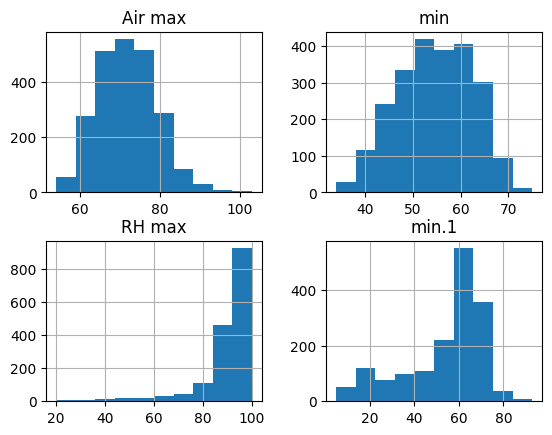

In [ ]:
weather.hist()

# Combining Datasets

In [27]:
final_df = pd.concat([calendar, listings], axis = 1)

In [28]:
final_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,id,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,29967,2022-09-18,f,225.0,4.0,365.0,29967.0,https://www.airbnb.com/rooms/29967,2.022092e+13,2022-09-18,...,4.91,4.80,4.76,NaN,f,5.0,5.0,0.0,0.0,0.59
1,29967,2022-09-19,f,225.0,4.0,365.0,38245.0,https://www.airbnb.com/rooms/38245,2.022092e+13,2022-09-18,...,4.79,4.61,4.40,NaN,f,3.0,0.0,3.0,0.0,1.02
2,29967,2022-09-20,f,225.0,4.0,365.0,108349.0,https://www.airbnb.com/rooms/108349,2.022092e+13,2022-09-19,...,4.81,4.89,4.69,NaN,t,2.0,2.0,0.0,0.0,1.20
3,29967,2022-09-21,f,225.0,4.0,365.0,126344.0,https://www.airbnb.com/rooms/126344,2.022092e+13,2022-09-18,...,4.81,4.78,4.65,NaN,t,2.0,2.0,0.0,0.0,1.38
4,29967,2022-09-22,f,225.0,4.0,365.0,54001.0,https://www.airbnb.com/rooms/54001,2.022092e+13,2022-09-18,...,4.98,4.97,4.89,NaN,f,2.0,1.0,1.0,0.0,2.08


In [29]:
final_df.shape

(5173672, 81)